In [1]:
enron_data_url = 'https://raw.githubusercontent.com/pierretd/data-dump/master/finance/fraud/enron.csv'
!curl https://raw.githubusercontent.com/pierretd/data-dump/master/finance/fraud/enron.csv
!wget https://raw.githubusercontent.com/pierretd/data-dump/master/finance/fraud/enron.csv


column_a, message_id, date, from, to, subject, x_from, x_to, x_cc, x_bcc, x_folder, x_origin, x_filename, content, user, cat_1_level_1, cat_1_level_2, cat_1_weight, cat_2_level_1, cat_2_level_2, cat_2_weight, cat_3_level_1, cat_3_level_2, cat_3_weight, cat_4_level_1, cat_4_level_2, cat_4_weight, cat_5_level_1, cat_5_level_2, cat_5_weight, cat_6_level_1, cat_6_level_2, cat_6_weight, cat_7_level_1, cat_7_level_2, cat_7_weight, cat_8_level_1, cat_8_level_2, cat_8_weight, cat_9_level_1, cat_9_level_2, cat_9_weight, cat_10_level_1, cat_10_level_2, cat_10_weight, cat_11_level_1, cat_11_level_2, cat_11_weight, cat_12_level_1, cat_12_level_2, cat_12_weight, labeled
181904, <3179368.1075846947356.JavaMail.evans@thyme>, 2000-05-04T12:59:00, frozenset({'tana.jones@enron.com'}), frozenset({'susan.flynn@enron.com'}), Re: Confidentiality Agreements, Tana Jones, Susan Flynn, , , \Tanya_Jones_Dec2000\Notes Folders\All documents, JONES-T, tjones.nsf, In my directory., jones-t, , , , , , , , , , , , , ,

The Enron email dataset contains approximately 500,000 emails generated by employees of the Enron Corporation. It was obtained by the Federal Energy Regulatory Commission during its investigation of Enron's collapse.

This is the May 7, 2015 Version of dataset, as published at https://www.cs.cmu.edu/~./enron/

Those 1,700 records that were labeled by students are marked with labeled set were labelled by CMU students.

There are up to 12 categories per email:

Cat_[1-12]_level_1 = top-level category
Cat_[1-12]_level_2 = second-level category
Cat_[1-12]_level_weight = frequency with which this category was assigned to this message
Here are the categories:

1 Coarse genre
1.1 Company Business, Strategy, etc. (elaborate in Section 3 [Topics]) (855 cnt.)
1.2 Purely Personal (49 cnt.)
1.3 Personal but in professional context (e.g., it was good working with you) (165 cnt.)
1.4 Logistic Arrangements (meeting scheduling, technical support, etc) (533 cnt.)
1.5 Employment arrangements (job seeking, hiring, recommendations, etc) (96 cnt.)
1.6 Document editing/checking (collaboration) (176 cnt.)
1.7 Empty message (due to missing attachment) (25 cnt.)
1.8 Empty message (26 cnt.)
2 Included/forwarded information
2.1 Includes new text in addition to forwarded material (680 cnt.)
2.2 Forwarded email(s) including replies (913 cnt.)
2.3 Business letter(s) / document(s) (42 cnt.)
2.4 News article(s) (124 cnt.)
2.5 Government / academic report(s) (15 cnt.)
2.6 Government action(s) (such as results of a hearing, etc) (25 cnt.)
2.7 Press release(s) (13 cnt.)
2.8 Legal documents (complaints, lawsuits, advice) (22 cnt.)
2.9 Pointers to url(s) (55 cnt.)
2.10 Newsletters (18 cnt.)
2.11 Jokes, humor (related to business) (7 cnt.)
2.12 Jokes, humor (unrelated to business) (6 cnt.)
2.13 Attachment(s) (assumed missing) (311 cnt.)
3 Primary topics (if coarse genre 1.1 is selected)
3.1 regulations and regulators (includes enron caps) (203 cnt.)
3.2 internal projects -- progress and strategy (125 cnt.)
3.3 company image -- current (71 cnt.)
3.4 company image -- changing / influencing (63 cnt.)
3.5 political influence / contributions / contacts (108 cnt.)
3.6 california energy crisis / california politics (249 cnt.)
3.7 internal company policy (83 cnt.)
3.8 internal company operations (107 cnt.)
3.9 alliances / partnerships (64 cnt.)
3.10 legal advice (77 cnt.)
3.11 talking points (26 cnt.)
3.12 meeting minutes (33 cnt.)
3.13 trip reports (7 cnt.)
4 Emotional tone (if not neutral)
4.1 jubilation (12 cnt.)
4.2 hope / anticipation (20 cnt.)
4.3 humor (22 cnt.)
4.4 camaraderie (20 cnt.)
4.5 admiration (13 cnt.)
4.6 gratitude (21 cnt.)
4.7 friendship / affection (13 cnt.)
4.8 sympathy / support (7 cnt.)
4.9 sarcasm (18 cnt.)
4.10 secrecy / confidentiality (130 cnt.)
4.11 worry / anxiety (28 cnt.)
4.12 concern (38 cnt.)
4.13 competitiveness / aggressiveness (8 cnt.)
4.14 triumph / gloating (3 cnt.)
4.15 pride (3 cnt.)
4.16 anger / agitation (10 cnt.)
4.17 sadness / despair (2 cnt.)
4.18 shame (1 cnt.)
4.19 dislike / scorn (9 cnt.)

In [45]:
# Step 2 - load the data
import pandas as pd
enron_data = pd.read_csv(enron_data_url, header=None, error_bad_lines=False)


b'Skipping line 4: expected 52 fields, saw 59\nSkipping line 6: expected 52 fields, saw 54\nSkipping line 7: expected 52 fields, saw 61\nSkipping line 8: expected 52 fields, saw 58\nSkipping line 9: expected 52 fields, saw 56\nSkipping line 10: expected 52 fields, saw 60\nSkipping line 11: expected 52 fields, saw 87\nSkipping line 12: expected 52 fields, saw 61\nSkipping line 13: expected 52 fields, saw 71\nSkipping line 14: expected 52 fields, saw 53\nSkipping line 16: expected 52 fields, saw 55\nSkipping line 17: expected 52 fields, saw 56\nSkipping line 18: expected 52 fields, saw 58\nSkipping line 19: expected 52 fields, saw 54\nSkipping line 20: expected 52 fields, saw 59\nSkipping line 21: expected 52 fields, saw 53\nSkipping line 22: expected 52 fields, saw 135\nSkipping line 23: expected 52 fields, saw 185\nSkipping line 24: expected 52 fields, saw 55\nSkipping line 25: expected 52 fields, saw 58\nSkipping line 30: expected 52 fields, saw 56\nSkipping line 31: expected 52 field

In [46]:
enron_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,column_a,message_id,date,from,to,subject,x_from,x_to,x_cc,x_bcc,x_folder,x_origin,x_filename,content,user,cat_1_level_1,cat_1_level_2,cat_1_weight,cat_2_level_1,cat_2_level_2,cat_2_weight,cat_3_level_1,cat_3_level_2,cat_3_weight,cat_4_level_1,cat_4_level_2,cat_4_weight,cat_5_level_1,cat_5_level_2,cat_5_weight,cat_6_level_1,cat_6_level_2,cat_6_weight,cat_7_level_1,cat_7_level_2,cat_7_weight,cat_8_level_1,cat_8_level_2,cat_8_weight,cat_9_level_1,cat_9_level_2,cat_9_weight,cat_10_level_1,cat_10_level_2,cat_10_weight,cat_11_level_1,cat_11_level_2,cat_11_weight,cat_12_level_1,cat_12_level_2,cat_12_weight,labeled
1,181904,<3179368.1075846947356.JavaMail.evans@thyme>,2000-05-04T12:59:00,frozenset({'tana.jones@enron.com'}),frozenset({'susan.flynn@enron.com'}),Re: Confidentiality Agreements,Tana Jones,Susan Flynn,,,\Tanya_Jones_Dec2000\Notes Folders\All documents,JONES-T,tjones.nsf,In my directory.,jones-t,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,false
2,181905,<16989609.1075846947378.JavaMail.evans@thyme>,2000-05-04T13:00:00,frozenset({'tana.jones@enron.com'}),frozenset({'aherrera@statoilenergy.com'}),Re: Trades to be assigned,Tana Jones,"""Anita Herrera"" <aherrera@statoilenergy.com>@...",,,\Tanya_Jones_Dec2000\Notes Folders\All documents,JONES-T,tjones.nsf,You don't appear to have attached the list......,jones-t,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,false
3,181907,<29712464.1075846947400.JavaMail.evans@thyme>,2000-05-04T14:40:00,frozenset({'aherrera@statoilenergy.com'}),frozenset({'tana.jones@enron.com'}),Re: Trades to be assigned,"""Anita Herrera"" <aherrera@statoilenergy.com>",Tana.Jones@enron.com,,,\Tanya_Jones_Dec2000\Notes Folders\All documents,JONES-T,tjones.nsf,(See attached file: Enron nat gas trades.xls)...,jones-t,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,false
4,181917,<13967138.1075846914289.JavaMail.evans@thyme>,1999-07-28T09:28:00,frozenset({'tana.jones@enron.com'}),frozenset({'elizabeth.sager@enron.com'}),Husky Oil,Tana Jones,Elizabeth Sager,,,\Tanya_Jones_Dec2000\Notes Folders\All documents,JONES-T,tjones.nsf,I still need to see you about that Market Dis...,jones-t,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,false


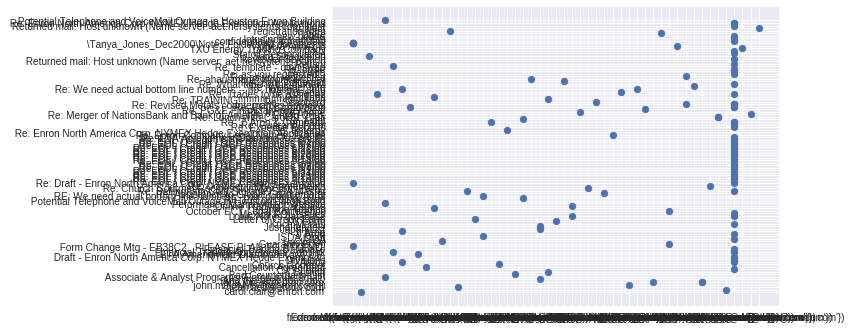

In [48]:
plt.scatter(enron_data[4], enron_data[5])

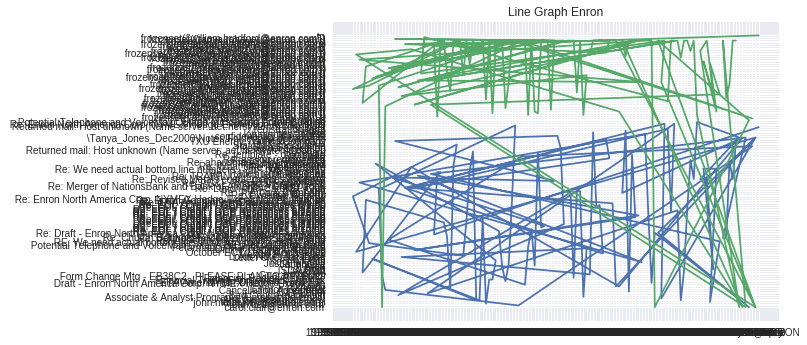

In [58]:
import matplotlib.pyplot as plt

x  = enron_data[2]
y1 = enron_data[5]
y2 = enron_data[4]
plt.plot(x, y1,)
plt.plot(x, y2, )
plt.plot()
plt.title("Line Graph Enron")
plt.show();

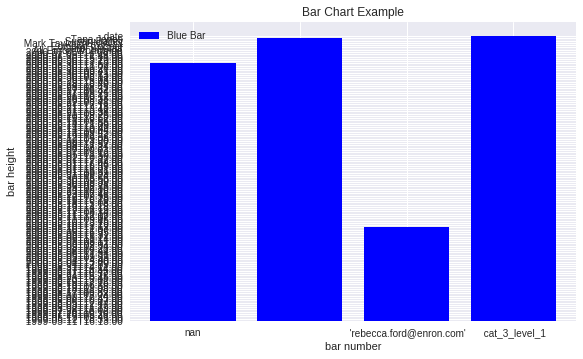

In [59]:
import matplotlib.pyplot as plt

# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = enron_data[21]
y1 = enron_data[2]



# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Blue Bar", color='b')
plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()


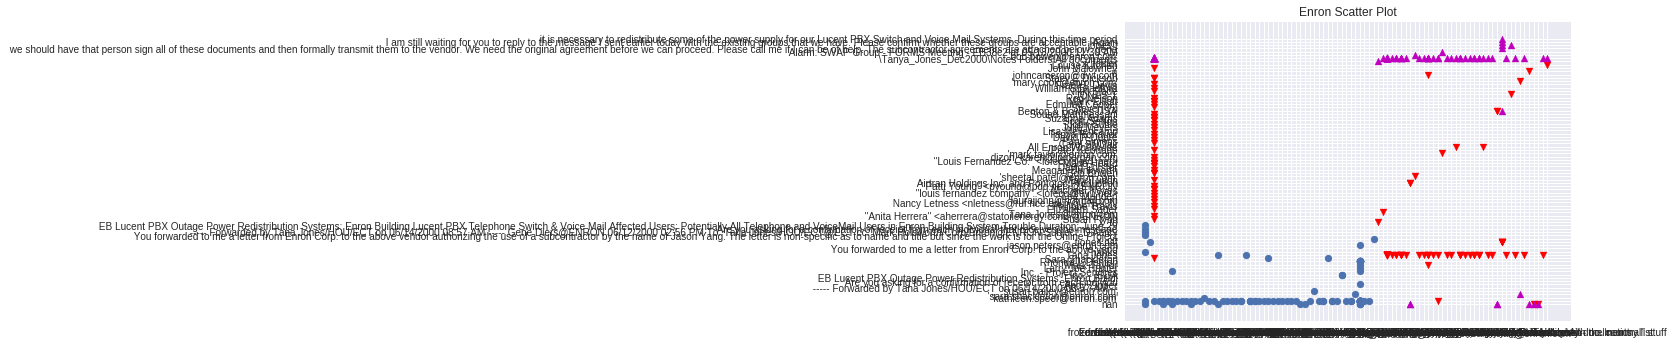

In [53]:
import matplotlib.pyplot as plt

x1 = enron_data[4]
y1 = enron_data[8]

x2 = enron_data[6]
y2 = enron_data[7]
y3 = enron_data[10]

# Markers: 
plt.scatter(x1, y1)
plt.scatter(x2, y2, marker='v', color='r')
plt.scatter(x2, y3, marker='^', color='m')
plt.title('Enron Scatter Plot')
plt.show()

Ok. Some of these graphs look like they might be telling a story, let's try to clean it up.

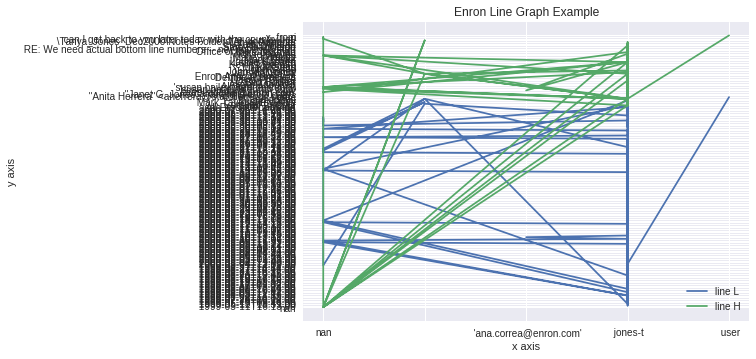

In [54]:
import matplotlib.pyplot as plt

x  = enron_data[14]
y1 = enron_data[2]
y2 = enron_data[6]
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Enron Line Graph Example")
plt.legend()
plt.show()

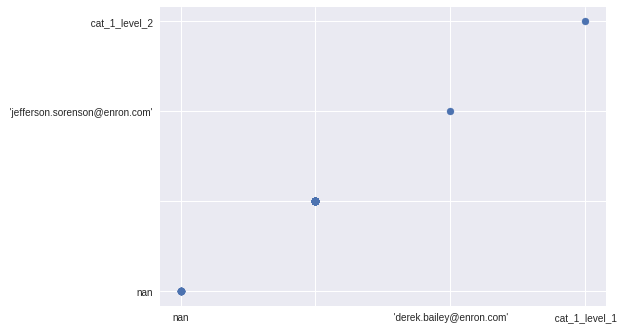

In [55]:
plt.scatter(enron_data[15], enron_data[16])

In [56]:
enron_data[16].describe()

count     111
unique      3
top          
freq      109
Name: 16, dtype: object

In [57]:
enron_data[15].describe()

count     111
unique      3
top          
freq      109
Name: 15, dtype: object